In [1]:
import matplotlib.pyplot as plt
import os
import random
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchvision import transforms as T
from torch.utils.data import DataLoader, random_split
#
import PIL
from PIL import Image
#
from cargar_dataset import carga_carDataset
from models.UnetModelMultiClass import *
from utilidades.utilidades import accuracy
from utilidades.classweights import calculate_class_weights
#

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [3]:
PATH = "data/"
TRAIN_PATH = "data/train/JPEGImages/"
TRAIN_MASKS_PATH="data/train/JPEGMasks/"
TEST_PATH = ".data/test/"
#
BATCH_SIZE = 32

In [4]:
full_dataset = carga_carDataset.Car_Dataset(
    TRAIN_PATH,
    TRAIN_MASKS_PATH,
    data_augmented=False)

In [5]:
TRAIN_SIZE = int(len(full_dataset)*0.8)
VAL_SIZE = len(full_dataset) - TRAIN_SIZE

train_dataset, val_dataset = random_split(full_dataset, [TRAIN_SIZE,VAL_SIZE])

train_loader = DataLoader(train_dataset,batch_size=BATCH_SIZE,shuffle=True)
val_loader   = DataLoader(val_dataset,batch_size=BATCH_SIZE,shuffle=True)

In [6]:
print(len(train_loader))
imgs, masks = next(iter(train_loader))

10


tensor(18)
tensor(0)
tensor([ 0,  8,  0,  8,  0,  8,  0,  8,  0,  8,  0,  9,  0,  9,  3,  0,  8,  0,
         9,  3,  0,  8,  0,  9,  3,  0,  8,  0,  9,  3,  0,  8,  0,  9,  3,  0,
         8,  0,  9,  3,  0,  8,  0,  9,  3,  0,  8,  0,  9,  3,  0,  8,  0,  9,
         3,  0,  8,  0,  9,  3,  0,  8,  0,  9,  3,  0,  8,  0,  9,  3,  0,  8,
         0,  9,  3,  0,  8,  0,  9,  3,  0,  8,  0,  9,  3,  0,  8,  0,  9,  3,
         0,  8,  0,  9,  3,  0,  8,  0,  9,  3,  0,  8,  0,  9,  3,  0,  8,  0,
         9,  3,  0,  8,  0,  9,  3,  0,  8,  0,  9,  3,  0,  8,  0,  9,  3,  0,
         8,  0,  9,  3,  0,  8,  0,  9,  3,  0,  8,  0,  9,  3,  0,  8,  0,  9,
         3,  0,  8,  0,  9,  3,  0,  8,  0, 13,  0,  9,  3,  0, 13,  0,  9,  3,
         0, 13,  0,  9,  3,  0, 13,  0,  9,  3,  0, 13,  0,  9,  3,  0, 13,  0,
         9,  3,  0, 13,  0,  9,  3,  0, 13,  0,  9,  3,  0,  4,  0, 13,  0,  9,
         3,  0,  4,  0, 13,  0,  7,  0,  9,  3,  0,  4,  0, 13,  7,  0,  9,  3,
         0,  4,  0,

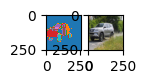

In [7]:
for imgs,maskss in train_loader:
    plt.figure(figsize=(1,2))
    for i in range(BATCH_SIZE):
        unicos = torch.unique(maskss[i,...])
        print(unicos.max())
        print(unicos.min())
        plt.subplot(1,2, 1)
        plt.imshow(maskss[i,...],cmap='tab10')
        plt.subplot(1,2,2)
        plt.imshow(imgs[i,...].permute(1,2,0).numpy())
        print(unicos)
        print(len(unicos))
        break
    break


In [20]:
torch.unique(masks)

tensor([  0, 217,   0,  ...,   0,   1,   0])

In [13]:
unique1 = torch.unique(torch.unique(masks))
print(unique1.shape)
print(unique1)

torch.Size([112008])
tensor([ 0, 13,  0,  ...,  0,  4,  0])
